## Base de datos 
Esta es una base de datos extraida de https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset. En ella se exponen los datos de un hipermercado en varios años.

### Librerias necesarias para el analisis

In [1638]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
import session_info

### Función auxiliar para graficar

In [1639]:
def plot_easy_v2(c,df,df1,world,world1,world2):
    m=str(world)
    m1=str(world1)
    m2=str(world2)
    c1=[]
    Sales_total=[]
    Profit_total=[]
    for i in c:
        df1=df[df[m]==i]
        Sales_total.append(df1[m1].sum())
        Profit_total.append(df1[m2].sum())
        c1.append(str(i))  
    df11 = pd.DataFrame()
    df11[m]=c1 
    df11[m1]=Sales_total 
    df11[m2]=Profit_total 
    plt.figure(figsize=[5,5])
    plt.bar(df11[m],df11[m1] ,0.4,label = m1)
    plt.bar(df11[m],df11[m2] , 0.4 ,label = m2)
    plt.xticks(rotation=45)
    plt.xlabel(m)
    m3=str(m1+' vs '+m2)
    plt.ylabel(m3)
    plt.legend()
    plt.title(m3)
    plt.show()

### Exploración del Archivo
Visualización de las columnas o variables. 

In [1640]:
df = pd.read_excel('Sample_Superstore.xls')
table_name = df.columns.values
print(table_name)

['Row ID' 'Order ID' 'Order Date' 'Ship Date' 'Ship Mode' 'Customer ID'
 'Customer Name' 'Segment' 'Country' 'City' 'State' 'Postal Code' 'Region'
 'Product ID' 'Category' 'Sub-Category' 'Product Name' 'Sales' 'Quantity'
 'Discount' 'Profit']


Los siguientes son los nombres de las columnas:
- Row ID (identificación de fila)
- Order ID (identifiación de la orden)
- Order Date (fecha de la orden)
- Ship Date (fecha de envio)
- Ship Mode (modo de envio) 
- Customer ID (identificación del cliente)
- Customer Name (nombre del cliente)
- Segment (segmento: Corporación o cliente)
- Country (pais)
- City (ciudad)
- State (estado)
- Postal Code (código postal)
- Region (región)
- Product ID (identifiación de producto)
- Category (categoria)
- Sub-Category (sub categorias)
- Product Name (nombre del producto)
- Sales (ventas)
- Quantity (cantidad)
- Discount (descuento)
- Profit (ganancia)

#### Descripción de las variables
- Descripción de las variables en la base de datos.

In [1641]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## Limpieza de los datos
- Realizamos un conteo de los datos inexistentes en la base datos.
- Realizamos un conteo de los datos NaN en la base datos.
- Eliminamos los datos repetidos en la base de datos.

En Conclusión no se presentaron datos inexistentes o duplicados en la base de datos. En total el archivo cuenta con 21 caracteristicas y 9994 filas de datos. 

In [1642]:
null = df.isnull().sum() #suma las entradas nulas por cada variable
print('Cantidad de datos vacios:', null.sum()) # imprime el total
is_nan=df.isna().sum() #suma las entradas NaN por cada variable
print('Cantidad de datos NaN:',is_nan.sum()) # imprime el total
df = df.drop_duplicates() # elimina duplicados
print('Cantidad de filas: {} Cantidad de variables: {}'.format(df.shape[0],df.shape[1]))

Cantidad de datos vacios: 0
Cantidad de datos NaN: 0
Cantidad de filas: 9994 Cantidad de variables: 21


### Analisis por fechas:
- Usando la fecha de cada uno de las caracteriticas de dividen por año, mes y dia.
- Se crea un nuevo dataframe (df_year) para ordenar los datos por años
- Se crea un nuevo dataframe (df_month) para ordenar los datos por años
- Se crea un nuevo dataframe (df_day) para ordenar los datos por años

In [1643]:
########## Agregando La columna Year, Month y Day
df['Year']=[i.year for i in df['Order Date']]
df['Month']=[i.month for i in df['Order Date']]
df['Name_month']=[datetime.strptime(str(i),'%m').strftime('%B') for i in df['Month']]
days=['Mon','Tues','Wednes','Thurs','Fri','Satur','Sun']
df['Day']=[days[i.weekday()]+"day" for i in df['Order Date']]

######### Ordenando por años
df_year=df.sort_values(by=['Year'])
df_year=df_year['Year'].unique()

########## Ordenando por meses
df_month=df.sort_values(by=['Month'])
df_month=df_month['Month'].unique()
df_month=[datetime.strptime(str(i),'%m').strftime('%B') for i in df_month]
# strptime- convierte a formato de fecha '%d/%m/%Y' 
# strftime- convierte a nombres los meses "%d %B, %Y"

########## Ordenando por Dias
df_day=df.sort_values(by=['Day'])
df_day=df_day['Day'].unique()
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

### Graficas analizando los datos por fechas 

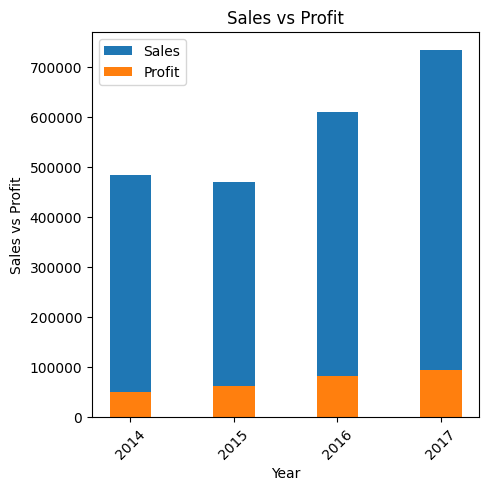

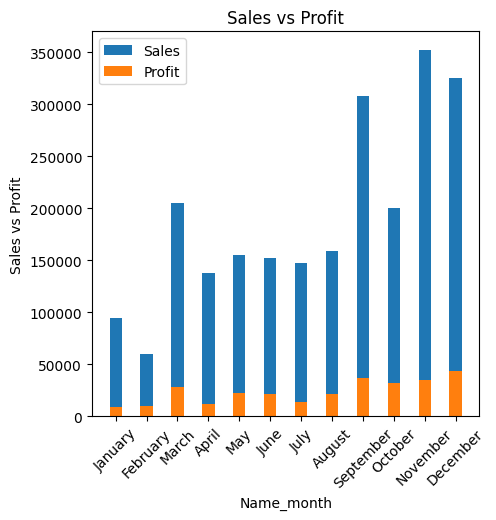

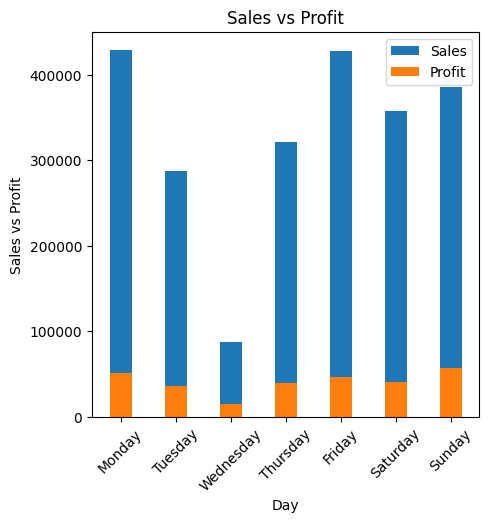

In [1644]:
plot_easy_v2(df_year,df,df_year,'Year','Sales','Profit')
plot_easy_v2(df_month,df,df_month,'Name_month','Sales','Profit')
plot_easy_v2(days,df,df_day,'Day','Sales','Profit')

### ¿Cual es la fecha de la venta más grande?

In [1645]:
max_sales = df[df['Sales']==df['Sales'].max()]
max_sales.reset_index(drop=True, inplace=True)
print('El producto con la mayor venta es: {}. Una cantidad de {} unidades '
      .format(max_sales.loc[0,'Product Name'],max_sales.loc[0,'Quantity'])) 
print('La fecha es: {}. '.format(max_sales.loc[0,'Order Date'])) 
print('La venta fue de {} y un descuento de {}'.format(max_sales.loc[0,'Sales'],max_sales.loc[0,'Profit'])) 

El producto con la mayor venta es: Cisco TelePresence System EX90 Videoconferencing Unit. Una cantidad de 6 unidades 
La fecha es: 2014-03-18 00:00:00. 
La venta fue de 22638.48 y un descuento de -1811.0784000000021


### Datos acumulados por dias
El siguiente es un analisis de ventas acumuladas por dias

In [1646]:
df_acum_days=df.groupby(['Order Date'])["Sales"].sum().reset_index()
print('El día con la mayor cantidad de ganancias es: {}. Las ganancias acumuladas fueron: {} '
      .format(df_acum_days.max()['Order Date'],df_acum_days.max()['Sales']))

El día con la mayor cantidad de ganancias es: 2017-12-30 00:00:00. Las ganancias acumuladas fueron: 28106.716 


### Datos acumulados por semanas
El siguiente es un analisis de ventas acumuladas por semanas

La semana con la mayor cantidad de ganancias es: 12.0 del año 2014.0. Las ganancias acumuladas fueron: 38176.809 


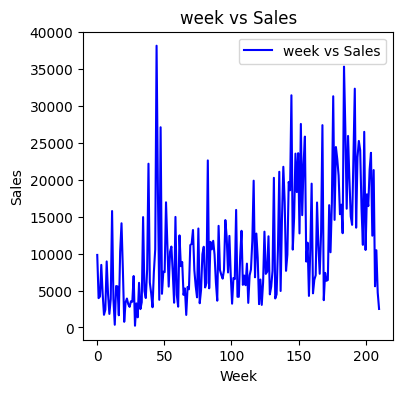

In [1647]:
df_week=df.sort_values(by=['Order Date'])
df_week['Week']=[i.isocalendar().week for i in df_week['Order Date']]
df_week=df_week.groupby(['Week','Year'])["Sales"].sum().reset_index()
print('La semana con la mayor cantidad de ganancias es: {} del año {}. Las ganancias acumuladas fueron: {} '
     .format(df_week.sort_values(by=['Sales']).iloc[-1]['Week'],
             df_week.sort_values(by=['Sales']).iloc[-1]['Year'],
             df_week.sort_values(by=['Sales']).iloc[-1]['Sales']))
plt.figure(figsize=[4,4])
plt.plot(np.linspace(0,df_week.shape[0],df_week.shape[0]),
         df_week['Sales'], 'b',label = 'week vs Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.legend()
plt.title('week vs Sales')
plt.show()

### Analisis usando los 5 productos más vendidos

In [1648]:
name_product=df['Product Name'].unique()
print('Hay una cantidad de {} productos con identificación diferente'.format(name_product.shape[0]))

Hay una cantidad de 1850 productos con identificación diferente


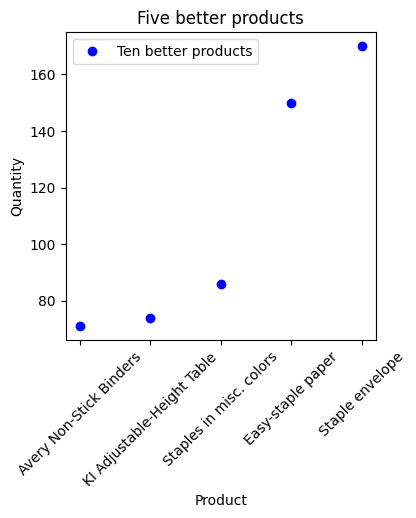

In [1649]:
df_product=df.groupby(['Product Name'])['Quantity'].sum().reset_index()
df_product=df_product.sort_values(by=['Quantity'],ascending=True).reset_index()
df_product=df_product[df_product.shape[0]-6:df_product.shape[0]-1]
plt.figure(figsize=[4,4])
plt.plot(df_product['Product Name'],
         df_product['Quantity'], 'bo',label = 'Ten better products')
plt.xticks(rotation=45)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.legend()
plt.title('Five better products')
plt.show()

### Predicción de las ventas
Realizando un analisis por días todos los meses contienen días sin registro de ventas. En este caso se presentan 1237 registros entre las fechas 2014-01-03 hasta 2017-12-30. Para obtener los datos por día se usó el promedio de las caracteriticas numericas. Las caracteristicas que se tienen en cuenta son:
- Cantidad
- Descuento
- Ganancia
- Ventas

In [1650]:
df_serie_temp=df[['Order Date','Quantity','Discount','Profit','Sales']]
df_serie_temp=df_serie_temp.sort_values(by=['Order Date'])
df_serie_temp.reset_index(inplace=True, drop=True)
df_serie_temp=df_serie_temp.groupby(['Order Date']).mean().reset_index()

#### Matriz de correlación
Construimos una matriz de correlación y observamos que las variables más correlacionadas con la variables Ventas son: cantidad y ganancia.

In [1651]:
corr = df_serie_temp.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,Order Date,Quantity,Discount,Profit,Sales
Order Date,1.000000,-0.001984,-0.002056,0.042575,0.018589
Quantity,-0.001984,1.000000,-0.009687,-0.053921,0.268908
Discount,-0.002056,-0.009687,1.000000,-0.287174,-0.038578
Profit,0.042575,-0.053921,-0.287174,1.000000,0.248350
Sales,0.018589,0.268908,-0.038578,0.248350,1.000000


Eliminamos las caractertisticas fecha de la orden y descuento.

In [1652]:
df_serie_temp = df_serie_temp.drop(['Order Date','Discount'], axis=1)  
print(df_serie_temp.columns)

Index(['Quantity', 'Profit', 'Sales'], dtype='object')


### Predicción usando Xgboost

XGBoost es un algoritmo de aprendizaje automático que permite resolver problemas de predicción, clasificación y regresión.
Primero dividimos los datos en los siguientes dos grupos:
- df_train: Toma el 90% de los datos y permite entrenar el modelo. 
- df_test: Toma el 10% de los datos y probar el modelo. 

In [1653]:
total_1 = int(df_serie_temp.shape[0]*0.9)
total_2 = int(df_serie_temp.shape[0]*0.1)
if (total_1+total_2)-df_serie_temp.shape[0]!=0:
    total_1=total_1+np.abs(total_1+total_2-df_serie_temp.shape[0])
df_train = df_serie_temp.iloc[:total_1,:]
df_test = df_serie_temp.iloc[total_1:df_serie_temp.shape[0],:]
X_train, y_train = df_train.iloc[:,:-1],df_train.iloc[:,-1]
X_test, y_test = df_test.iloc[:,:-1],df_test.iloc[:,-1]

Realizamos una primera predicción de los valores de ventas usando un conjunto de parámetros en el XGBoost. El gráfico contiene la comparación entre los valores reales y la predicción del algoritmo. 

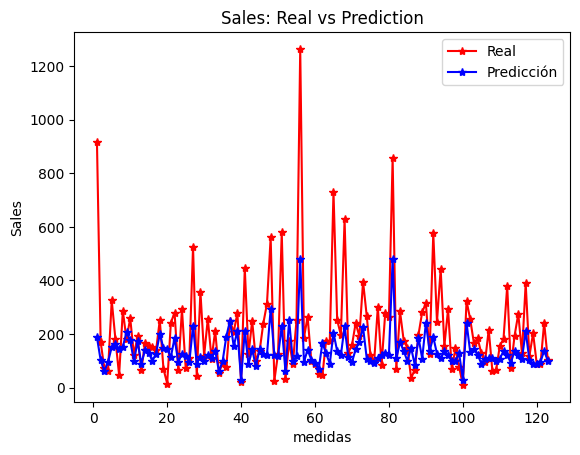

In [1654]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
            max_depth = 5, alpha = 10, n_estimators = 10, subsample = 0.7)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
plt.plot(range(1,y_test.shape[0]+1,1),y_test.values,'r*-',range(1,y_test.shape[0]+1,1),preds,'b*-')
plt.legend( ['Real',  'Predicción'])
plt.xlabel('medidas')
plt.ylabel('Sales')
plt.title('Sales: Real vs Prediction')
plt.show()

Calculo del error relativo porcentual (este tipo de error no es sensible a la magnitud de los datos) usando la norma euclidiana.

In [1655]:
error = np.linalg.norm(y_test-preds,2)/np.linalg.norm(y_test,2)*100
print('el error relativo porcentual es: {} % '.format(error))

el error relativo porcentual es: 56.986898432344816 % 


#### Función de hiperparametros para el Xgboost
La siguiente función permite encontrar los parámetros optimos para utilizar el algoritmo XGboost. 

In [1656]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01,0.1],
        'max_depth': range(3,10,2),
        'min_child_weight': range(1,6,2),
        'subsample': [i/100.0 for i in range(75,90,6)],
        'colsample_bytree':[i/100.0 for i in range(20,80,6)],
        'colsample_bytree': [0.3, 0.5],
        'n_estimators' : range(10,500,50),
        'objective': ['reg:squarederror']
    }
    xgb_model = XGBRegressor()
    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    gsearch.fit(X_train,y_train)
    return gsearch.best_params_

In [1657]:
m = hyperParameterTuning(X_train, y_train)
print('Parámetros mejorados para el XGBoost', m)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


Parámetros mejorados para el XGBoost {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 60, 'objective': 'reg:squarederror', 'subsample': 0.75}


Predicción usando los parámetros mejorados en el algoritmo XGBoost

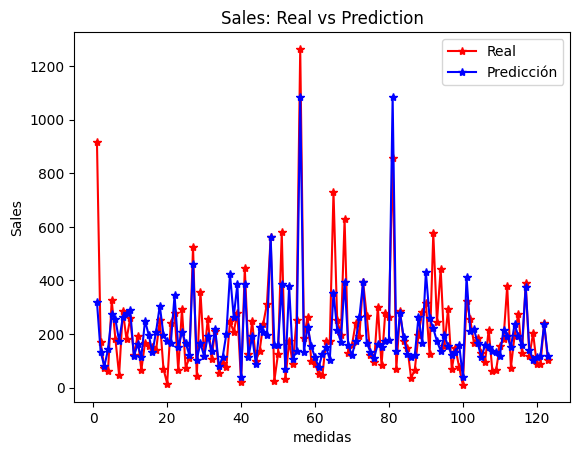

In [1658]:
xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = m['colsample_bytree'], learning_rate = m['learning_rate'],
        max_depth = m['max_depth'], alpha = 10,  n_estimators = m['n_estimators'], subsample = m['subsample'])
xg_reg1.fit(X_train,y_train)
preds_best = xg_reg1.predict(X_test)
plt.plot(range(1,y_test.shape[0]+1,1),y_test.values,'r*-',range(1,y_test.shape[0]+1,1),preds_best,'b*-' )
plt.legend( ['Real',  'Predicción'])
plt.xlabel('medidas')
plt.ylabel('Sales')
plt.title('Sales: Real vs Prediction')
plt.show()

Calculo del error usando los hiperparametros. 

In [1659]:
error = np.linalg.norm(y_test-preds_best,2)/np.linalg.norm(y_test,2)*100
print('el error relativo porcentual es: {} % '.format(error))

el error relativo porcentual es: 39.38022098442681 % 


### Información de la sesión

In [1660]:
session_info.show(html=False)

-----
matplotlib          3.7.1
numpy               1.24.2
pandas              2.0.2
seaborn             0.12.2
session_info        1.0.0
sklearn             1.2.2
xgboost             1.7.6
-----
IPython             8.12.0
jupyter_client      8.1.0
jupyter_core        5.3.0
-----
Python 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
Windows-10-10.0.22621-SP0
-----
Session information updated at 2023-07-04 23:13
